### Isolation forest is unsupervised tree based algorithm to isolate anomalous data points. It works by randomly partioning the feature space & using the number of partitions required to isolate a data points as an indicator of its anomalousness. Much situated for global anomaly. 
#### Returns:  '1'  for normal data points,   '-1' for anomalous data points


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#atificaially generating timeseries data
def generate_timeseries(start_date, end_date, freq, columns):
  
    time_index = pd.date_range(start=start_date, end=end_date, freq=freq)
    signals = {}
    for column in columns:
        if column=='actual_anomaly':
            signals[column]=np.full((len(time_index),1), 1).flatten()
        else:
            signals[column] = np.random.rand(len(time_index))*100
    return(pd.DataFrame(signals, index=time_index))

  

In [3]:
ts_data = generate_timeseries(start_date='2023-02-01',end_date='2023-02-05', freq='5S', columns=['Y1', 'Y2','Y3','Y4','Y5','actual_anomaly'])
ts_data.head(20)

Y1         Y2         Y3         Y4         Y5  \
2023-02-01 00:00:00  18.992610  47.368355   0.431688  77.531333  56.428693   
2023-02-01 00:00:05  13.857586   4.399276  52.549988  47.471515  44.144190   
2023-02-01 00:00:10  99.954283  55.634833  29.528969   2.653018  10.170268   
2023-02-01 00:00:15  59.249056  36.098139  22.326744  53.805755  84.814038   
2023-02-01 00:00:20  34.463507  61.448220  74.057588  18.632856  45.105389   
2023-02-01 00:00:25  34.848755  42.516334  18.774315  10.946204   9.483821   
2023-02-01 00:00:30  59.942840  40.266105  34.280873  80.298141  33.026309   
2023-02-01 00:00:35  15.491829   7.130425  81.549000  52.381558  35.137681   
2023-02-01 00:00:40  61.294084  13.261362   3.533113  42.707878  70.742640   
2023-02-01 00:00:45  29.737399  85.980685   8.481981  69.322922  64.090230   
2023-02-01 00:00:50  72.326909  12.851677  49.979424   1.342540  52.584132   
2023-02-01 00:00:55  73.542958   6.540129  13.066809  59.971039  39.744134   
2023-02-01 00:01:00  11.419397  19.333938  75.815719  83.625802  22.713453   
2023-02-01 00:01:05  57.340264  29.753577   0.197903  73.238920   5.419805   
2023-02-01 00:01:10  59.832667  79.049452  68.960423  32.415503   0.502257   
2023-02-01 00:01:15  97.601056  66.933788  53.754097   6.053876  10.509204   
2023-02-01 00:01:20  13.985060  44.582908  13.742570  20.545903  50.567251   
2023-02-01 00:01:25  36.372292   8.103729  50.589213  33.845808  95.387129   
2023-02-01 00:01:30  26.232516  13.091799  21.804005  60.727557  57.963725   
2023-02-01 00:01:35  97.122353   0.304437  10.860242  90.951933  74.682545   

                     actual_anomaly  
2023-02-01 00:00:00               1  
2023-02-01 00:00:05               1  
2023-02-01 00:00:10               1  
2023-02-01 00:00:15               1  
2023-02-01 00:00:20               1  
2023-02-01 00:00:25               1  
2023-02-01 00:00:30               1  
2023-02-01 00:00:35               1  
2023-02-01 00:00:40               1  
2023-02-01 00:00:45               1  
2023-02-01 00:00:50               1  
2023-02-01 00:00:55               1  
2023-02-01 00:01:00               1  
2023-02-01 00:01:05               1  
2023-02-01 00:01:10               1  
2023-02-01 00:01:15               1  
2023-02-01 00:01:20               1  
2023-02-01 00:01:25               1  
2023-02-01 00:01:30               1  
2023-02-01 00:01:35               1

In [4]:
ts_data.shape

(69121, 6)

In [5]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69121 entries, 2023-02-01 00:00:00 to 2023-02-05 00:00:00
Freq: 5S
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Y1              69121 non-null  float64
 1   Y2              69121 non-null  float64
 2   Y3              69121 non-null  float64
 3   Y4              69121 non-null  float64
 4   Y5              69121 non-null  float64
 5   actual_anomaly  69121 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 3.4 MB


In [6]:
fig = px.line(ts_data.head(1500))
fig.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

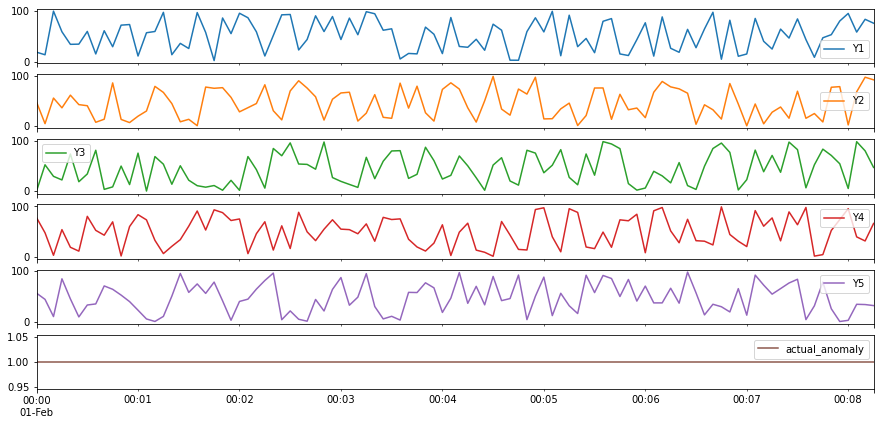

In [7]:
ts_data.head(100).plot(subplots=True, figsize=(15, 7))

In [8]:
#creating spikes on particular frequency and marking as anomaly using '-1'
count=1
for col in ts_data.columns[:-1]:
    spike=19*count           #[Y1-19,Y2-76,Y3-133,Y4-190,Y5-247] spike created on respective freq
    #print(spike)
    for i in range(spike,len(ts_data),spike+1):
        ts_data[col].iloc[i]=(290*(np.random.randint(-3,2))+160)
        ts_data.iloc[i,-1]=-1
    count += 3

In [9]:
ts_data.head(20)

Y1         Y2         Y3         Y4         Y5  \
2023-02-01 00:00:00   18.992610  47.368355   0.431688  77.531333  56.428693   
2023-02-01 00:00:05   13.857586   4.399276  52.549988  47.471515  44.144190   
2023-02-01 00:00:10   99.954283  55.634833  29.528969   2.653018  10.170268   
2023-02-01 00:00:15   59.249056  36.098139  22.326744  53.805755  84.814038   
2023-02-01 00:00:20   34.463507  61.448220  74.057588  18.632856  45.105389   
2023-02-01 00:00:25   34.848755  42.516334  18.774315  10.946204   9.483821   
2023-02-01 00:00:30   59.942840  40.266105  34.280873  80.298141  33.026309   
2023-02-01 00:00:35   15.491829   7.130425  81.549000  52.381558  35.137681   
2023-02-01 00:00:40   61.294084  13.261362   3.533113  42.707878  70.742640   
2023-02-01 00:00:45   29.737399  85.980685   8.481981  69.322922  64.090230   
2023-02-01 00:00:50   72.326909  12.851677  49.979424   1.342540  52.584132   
2023-02-01 00:00:55   73.542958   6.540129  13.066809  59.971039  39.744134   
2023-02-01 00:01:00   11.419397  19.333938  75.815719  83.625802  22.713453   
2023-02-01 00:01:05   57.340264  29.753577   0.197903  73.238920   5.419805   
2023-02-01 00:01:10   59.832667  79.049452  68.960423  32.415503   0.502257   
2023-02-01 00:01:15   97.601056  66.933788  53.754097   6.053876  10.509204   
2023-02-01 00:01:20   13.985060  44.582908  13.742570  20.545903  50.567251   
2023-02-01 00:01:25   36.372292   8.103729  50.589213  33.845808  95.387129   
2023-02-01 00:01:30   26.232516  13.091799  21.804005  60.727557  57.963725   
2023-02-01 00:01:35 -420.000000   0.304437  10.860242  90.951933  74.682545   

                     actual_anomaly  
2023-02-01 00:00:00               1  
2023-02-01 00:00:05               1  
2023-02-01 00:00:10               1  
2023-02-01 00:00:15               1  
2023-02-01 00:00:20               1  
2023-02-01 00:00:25               1  
2023-02-01 00:00:30               1  
2023-02-01 00:00:35               1  
2023-02-01 00:00:40               1  
2023-02-01 00:00:45               1  
2023-02-01 00:00:50               1  
2023-02-01 00:00:55               1  
2023-02-01 00:01:00               1  
2023-02-01 00:01:05               1  
2023-02-01 00:01:10               1  
2023-02-01 00:01:15               1  
2023-02-01 00:01:20               1  
2023-02-01 00:01:25               1  
2023-02-01 00:01:30               1  
2023-02-01 00:01:35              -1

In [10]:
ts_data['actual_anomaly'].value_counts() # '1':normal data point, '-1':anomaly data point

 1    63802
-1     5319
Name: actual_anomaly, dtype: int64

In [11]:

fig = px.line(ts_data.head(500))
fig.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

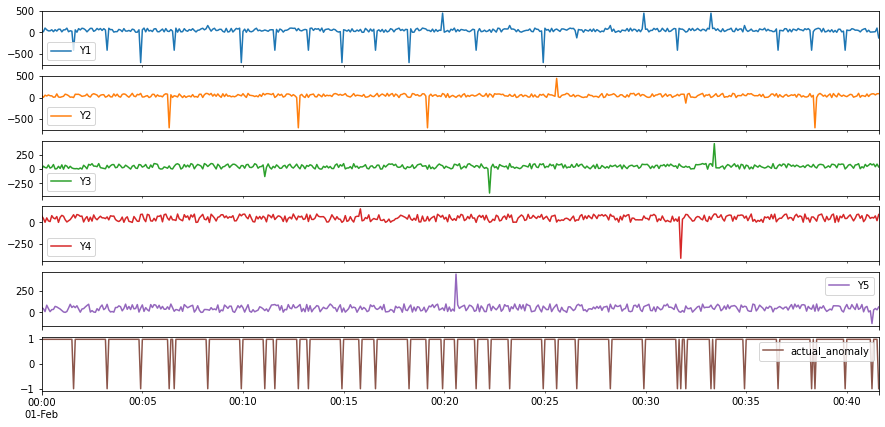

In [13]:
ts_data.head(500).plot(subplots=True, figsize=(15, 7))

In [14]:
#using isolation forest anomaly algorithm 
from sklearn.ensemble import IsolationForest
outliers_fraction = float(.11)
model=IsolationForest(contamination=outliers_fraction)
model.fit(ts_data.iloc[:,:-1])
ts_data["pred_anomaly"]=model.predict(ts_data.iloc[:,:-1])
ts_data["anomaly_score"]=model.decision_function(ts_data.iloc[:,:-2])

In [15]:
ts_data

Y1         Y2         Y3         Y4         Y5  \
2023-02-01 00:00:00   18.992610  47.368355   0.431688  77.531333  56.428693   
2023-02-01 00:00:05   13.857586   4.399276  52.549988  47.471515  44.144190   
2023-02-01 00:00:10   99.954283  55.634833  29.528969   2.653018  10.170268   
2023-02-01 00:00:15   59.249056  36.098139  22.326744  53.805755  84.814038   
2023-02-01 00:00:20   34.463507  61.448220  74.057588  18.632856  45.105389   
...                         ...        ...        ...        ...        ...   
2023-02-04 23:59:40   99.324805  32.439837  83.991227  34.213195  20.228352   
2023-02-04 23:59:45   21.331154  66.971396  60.759325  37.652620  22.011948   
2023-02-04 23:59:50   40.472583  16.423943  25.507593  67.466776  98.509039   
2023-02-04 23:59:55 -710.000000   3.780618   8.193097  52.228955  96.403878   
2023-02-05 00:00:00   22.126975  96.971258  90.133280   7.656294  61.319020   

                     actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:00:00               1             1       0.035409  
2023-02-01 00:00:05               1             1       0.059878  
2023-02-01 00:00:10               1             1       0.008709  
2023-02-01 00:00:15               1             1       0.062543  
2023-02-01 00:00:20               1             1       0.063343  
...                             ...           ...            ...  
2023-02-04 23:59:40               1             1       0.046498  
2023-02-04 23:59:45               1             1       0.059847  
2023-02-04 23:59:50               1             1       0.029108  
2023-02-04 23:59:55              -1            -1      -0.203565  
2023-02-05 00:00:00               1             1       0.001922  

[69121 rows x 8 columns]

In [16]:

from sklearn.metrics import confusion_matrix,classification_report

print('confusion_matrix \n',confusion_matrix(ts_data["pred_anomaly"],ts_data["actual_anomaly"]))
print('*********************************************')
print('classification_report \n',classification_report(ts_data["pred_anomaly"],ts_data["actual_anomaly"]))

confusion_matrix 
 [[ 4694  2910]
 [  625 60892]]
*********************************************
classification_report 
               precision    recall  f1-score   support

          -1       0.88      0.62      0.73      7604
           1       0.95      0.99      0.97     61517

    accuracy                           0.95     69121
   macro avg       0.92      0.80      0.85     69121
weighted avg       0.95      0.95      0.94     69121



In [17]:
fig = px.line(ts_data.head(1000))
fig.show()


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

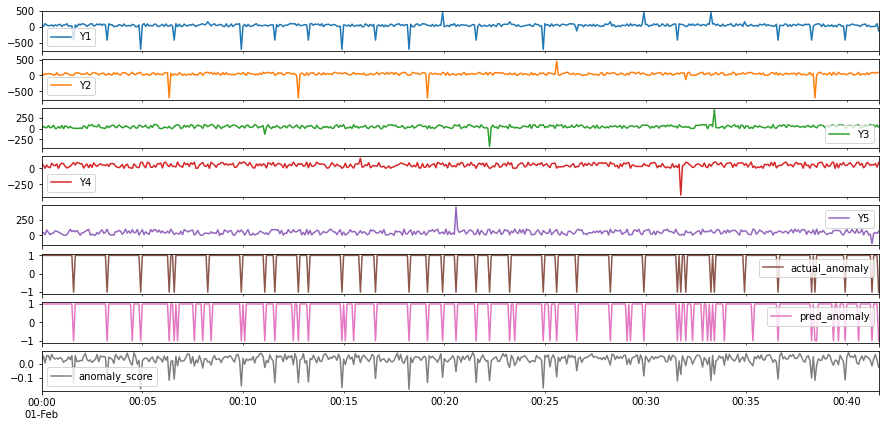

In [18]:
ts_data.head(500).plot(subplots=True, figsize=(15, 7))

In [14]:
ts_data[(ts_data["actual_anomaly"]==-1) &  (ts_data["pred_anomaly"]==-1)]

Y1          Y2         Y3         Y4         Y5  \
2023-02-01 00:01:35  450.000000   92.242508  12.670432  88.196225  86.161821   
2023-02-01 00:03:15  450.000000   87.380042  41.435516  39.758360  51.160356   
2023-02-01 00:04:55  450.000000   47.659995  42.337092  46.122863  20.356916   
2023-02-01 00:06:20   20.119962 -710.000000  71.891661  75.096529   6.530294   
2023-02-01 00:06:35  450.000000   36.749221  20.779698  80.478726  20.248524   
...                         ...         ...        ...        ...        ...   
2023-02-04 23:54:55 -420.000000   85.268969  68.052490  76.893802  81.415899   
2023-02-04 23:55:40   98.804959 -710.000000  51.848570  57.071209  40.718920   
2023-02-04 23:56:35  450.000000   25.244665  87.226607  44.990260  27.585227   
2023-02-04 23:58:15 -710.000000   13.312791  60.440716  32.343425  81.853391   
2023-02-04 23:59:55 -130.000000   42.951376  80.281091  94.971736  69.659548   

                     actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:01:35              -1            -1      -0.117816  
2023-02-01 00:03:15              -1            -1      -0.090248  
2023-02-01 00:04:55              -1            -1      -0.074437  
2023-02-01 00:06:20              -1            -1      -0.163729  
2023-02-01 00:06:35              -1            -1      -0.092219  
...                             ...           ...            ...  
2023-02-04 23:54:55              -1            -1      -0.094919  
2023-02-04 23:55:40              -1            -1      -0.147377  
2023-02-04 23:56:35              -1            -1      -0.094591  
2023-02-04 23:58:15              -1            -1      -0.150889  
2023-02-04 23:59:55              -1            -1      -0.039070  

[4780 rows x 8 columns]

In [15]:
ts_data[(ts_data["actual_anomaly"]==-1) &  (ts_data["pred_anomaly"]==-1)].shape

(4780, 8)

In [16]:
ts_data[(ts_data["actual_anomaly"]==-1) &  (ts_data["pred_anomaly"]==1)]

Y1          Y2          Y3          Y4  \
2023-02-01 00:18:15  160.000000   53.400695   47.894566   15.857584   
2023-02-01 00:26:35  160.000000   26.748113   75.858109   46.489233   
2023-02-01 00:31:45   61.502952   34.470421   49.396079  160.000000   
2023-02-01 00:41:35  160.000000   23.965073    5.363588   59.548289   
2023-02-01 01:36:10   73.554824  160.000000   59.670940   37.567355   
...                         ...         ...         ...         ...   
2023-02-04 23:14:55  160.000000   40.129360   74.629610   33.567132   
2023-02-04 23:23:15  160.000000   27.963360   29.063504   27.347423   
2023-02-04 23:45:50   59.064713   41.011540   60.673319  160.000000   
2023-02-04 23:49:55  160.000000   51.849519   93.549260   76.707699   
2023-02-04 23:50:45   35.858396   14.146108  160.000000   67.952483   

                            Y5  actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:18:15  30.100061              -1             1       0.036739  
2023-02-01 00:26:35  84.237871              -1             1       0.014128  
2023-02-01 00:31:45  72.513356              -1             1       0.021463  
2023-02-01 00:41:35  36.245499              -1             1       0.012902  
2023-02-01 01:36:10  55.763782              -1             1       0.024746  
...                        ...             ...           ...            ...  
2023-02-04 23:14:55  57.905080              -1             1       0.038670  
2023-02-04 23:23:15  85.531730              -1             1       0.012628  
2023-02-04 23:45:50  10.272113              -1             1       0.001717  
2023-02-04 23:49:55  47.387621              -1             1       0.017361  
2023-02-04 23:50:45  23.086559              -1             1       0.005724  

[539 rows x 8 columns]

In [17]:
ts_data[(ts_data["actual_anomaly"]==1) &  (ts_data["pred_anomaly"]==-1)]

Y1         Y2         Y3         Y4         Y5  \
2023-02-01 00:01:55  69.862380  36.540082  99.816456  96.786595  25.302084   
2023-02-01 00:06:05   4.913227  88.653955  91.792431   6.511595   2.798131   
2023-02-01 00:07:00  47.600622  95.844429  83.882191   9.414995   6.791079   
2023-02-01 00:07:20  36.869122  25.947459  95.921039  96.105169   2.941039   
2023-02-01 00:08:30  35.064986  43.427873  93.640568  93.187861  97.751444   
...                        ...        ...        ...        ...        ...   
2023-02-04 23:52:55  33.611381  90.418942   3.230865   3.779792   0.701665   
2023-02-04 23:55:00  51.398279  81.279349   2.323631   0.351188   1.474581   
2023-02-04 23:56:25  93.122580  94.150789  48.787070   0.617037  10.649044   
2023-02-04 23:57:50  85.547244  33.365170  84.128524  99.461929   0.085720   
2023-02-04 23:57:55   5.961520  85.628689  86.716456  86.446213   1.960373   

                     actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:01:55               1            -1      -0.004204  
2023-02-01 00:06:05               1            -1      -0.042906  
2023-02-01 00:07:00               1            -1      -0.009738  
2023-02-01 00:07:20               1            -1      -0.013607  
2023-02-01 00:08:30               1            -1      -0.008168  
...                             ...           ...            ...  
2023-02-04 23:52:55               1            -1      -0.045625  
2023-02-04 23:55:00               1            -1      -0.049923  
2023-02-04 23:56:25               1            -1      -0.018968  
2023-02-04 23:57:50               1            -1      -0.034128  
2023-02-04 23:57:55               1            -1      -0.008872  

[2824 rows x 8 columns]

In [18]:
ts_data[(ts_data["actual_anomaly"]==1) &  (ts_data["pred_anomaly"]==-1)].shape

(2824, 8)

In [19]:
# fig = px.line(ts_data.head(600),color='pred_anomaly')
# fig.show()

In [20]:
ts_data.loc['2023-02-01 00:25:00':'2023-02-01 00:30:00']

Y1         Y2         Y3         Y4         Y5  \
2023-02-01 00:25:00   49.337986  23.000842  46.059570  30.323541  96.345505   
2023-02-01 00:25:05    1.240648  10.102391  87.992917  85.613069   6.170352   
2023-02-01 00:25:10   55.948860  12.849755  93.454185  36.867515   9.269141   
2023-02-01 00:25:15   82.087449  59.396525  84.021897  75.459392   0.537013   
2023-02-01 00:25:20   85.169761  41.954348  42.384570  15.010251  53.444100   
...                         ...        ...        ...        ...        ...   
2023-02-01 00:29:40   69.662688  30.513186  33.761442  28.932420   2.424159   
2023-02-01 00:29:45   52.157932  39.147728  46.105467  12.404157  16.752150   
2023-02-01 00:29:50   86.005994  45.545825  42.385334  60.122064  26.692598   
2023-02-01 00:29:55 -130.000000  48.583641   3.224214  64.583565   2.940043   
2023-02-01 00:30:00   37.712626  62.680952  33.667776  60.100202  28.477970   

                     actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:25:00               1             1       0.046186  
2023-02-01 00:25:05               1             1       0.011728  
2023-02-01 00:25:10               1             1       0.035773  
2023-02-01 00:25:15               1             1       0.009230  
2023-02-01 00:25:20               1             1       0.071670  
...                             ...           ...            ...  
2023-02-01 00:29:40               1             1       0.038744  
2023-02-01 00:29:45               1             1       0.053598  
2023-02-01 00:29:50               1             1       0.077520  
2023-02-01 00:29:55              -1            -1      -0.060462  
2023-02-01 00:30:00               1             1       0.080528  

[61 rows x 8 columns]

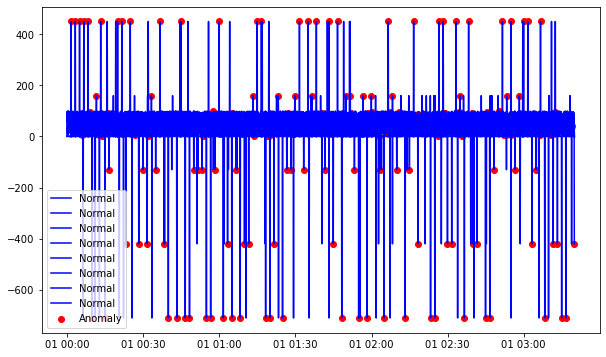

In [21]:
ts_data1=ts_data.head(2400)
fig, ax = plt.subplots(figsize=(10,6))
a = ts_data1.loc[ts_data1['pred_anomaly'] == -1] #anomaly
ax.plot(ts_data1.index, ts_data1, color='blue', label = 'Normal')
ax.scatter(a.index,a['Y1'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [22]:
ts_data1.loc[ts_data1['pred_anomaly'] == -1]

Y1          Y2         Y3         Y4         Y5  \
2023-02-01 00:01:35  450.000000   92.242508  12.670432  88.196225  86.161821   
2023-02-01 00:01:55   69.862380   36.540082  99.816456  96.786595  25.302084   
2023-02-01 00:03:15  450.000000   87.380042  41.435516  39.758360  51.160356   
2023-02-01 00:04:55  450.000000   47.659995  42.337092  46.122863  20.356916   
2023-02-01 00:06:05    4.913227   88.653955  91.792431   6.511595   2.798131   
...                         ...         ...        ...        ...        ...   
2023-02-01 03:13:15 -420.000000   80.341099   7.621755  80.863820   9.088943   
2023-02-01 03:14:55 -710.000000   12.624873  89.427224  29.509445  40.296558   
2023-02-01 03:16:35 -710.000000   64.502850  76.361663  38.694487  16.845945   
2023-02-01 03:18:50   39.927779 -420.000000  58.431142  69.616356  54.469036   
2023-02-01 03:19:55 -420.000000    3.670245  30.320013   2.399297  48.569341   

                     actual_anomaly  pred_anomaly  anomaly_score  
2023-02-01 00:01:35              -1            -1      -0.117816  
2023-02-01 00:01:55               1            -1      -0.004204  
2023-02-01 00:03:15              -1            -1      -0.090248  
2023-02-01 00:04:55              -1            -1      -0.074437  
2023-02-01 00:06:05               1            -1      -0.042906  
...                             ...           ...            ...  
2023-02-01 03:13:15              -1            -1      -0.110590  
2023-02-01 03:14:55              -1            -1      -0.146378  
2023-02-01 03:16:35              -1            -1      -0.143373  
2023-02-01 03:18:50              -1            -1      -0.101164  
2023-02-01 03:19:55              -1            -1      -0.106356  

[276 rows x 8 columns]

In [23]:
l1=list(range(4))

In [24]:
l1

[0, 1, 2, 3]

In [7]:
base_test=pd.read_csv("base_ts_elk.csv",index_col='Date')

In [8]:
#using isolation forest anomaly algorithm 
from sklearn.ensemble import IsolationForest
outliers_fraction = float(.11)
model=IsolationForest(contamination=outliers_fraction)
model.fit(base_test)
base_test["pred_anomaly"]=model.predict(base_test)
base_test["anomaly_score"]=model.decision_function(base_test.iloc[:,:-1])

In [9]:
base_test

Y1     Y2      Y3     Y4      Y5  pred_anomaly  \
Date                                                                  
4/3/2023 0:00     4.280  0.725   1.548  3.341   1.643             1   
4/3/2023 0:10     0.818  3.287   0.225  1.441   3.128             1   
4/3/2023 0:20     2.503  2.462   1.699  4.702   3.483             1   
4/3/2023 0:30     1.865  2.394   3.038  2.320   2.820             1   
4/3/2023 0:40     0.559  1.538   2.694  1.696   3.548             1   
...                 ...    ...     ...    ...     ...           ...   
4/24/2023 11:40  12.262 -2.545  11.255 -4.136  12.113             1   
4/24/2023 11:50  14.305 -4.023  11.437  0.098  12.050             1   
4/24/2023 12:00   9.903 -1.348  13.372 -1.530  11.606             1   
4/24/2023 12:10  13.739 -0.495  14.549 -5.366  13.448             1   
4/24/2023 12:20  12.489 -3.839  12.928 -0.091  12.219             1   

                 anomaly_score  
Date                            
4/3/2023 0:00         0.110360  
4/3/2023 0:10         0.091718  
4/3/2023 0:20         0.118258  
4/3/2023 0:30         0.147775  
4/3/2023 0:40         0.113918  
...                        ...  
4/24/2023 11:40       0.013291  
4/24/2023 11:50       0.033088  
4/24/2023 12:00       0.029319  
4/24/2023 12:10       0.018718  
4/24/2023 12:20       0.067436  

[3099 rows x 7 columns]

In [13]:
base_test[base_test['anomaly_score']<=0]

Y1     Y2      Y3     Y4      Y5  pred_anomaly  \
Date                                                                  
4/3/2023 4:40     2.337 -0.131   8.001  2.194  -0.148            -1   
4/3/2023 9:00    14.050  1.780  12.358 -4.113  11.689            -1   
4/3/2023 9:10    14.287 -6.055  14.606 -5.009  13.310            -1   
4/3/2023 9:30    14.100 -1.383  13.793  5.284  14.184            -1   
4/3/2023 9:40    12.714  0.128  14.761  4.070  13.266            -1   
...                 ...    ...     ...    ...     ...           ...   
4/24/2023 10:20  11.835 -6.943  12.712 -5.020  12.854            -1   
4/24/2023 10:40  13.194  2.619  15.987 -2.892  13.879            -1   
4/24/2023 10:50  13.100 -7.271  13.973  2.786  11.541            -1   
4/24/2023 11:00  11.691 -1.313  15.838  1.798  14.440            -1   
4/24/2023 11:30  13.990 -5.143  11.705 -2.418  14.811            -1   

                 anomaly_score  
Date                            
4/3/2023 4:40        -0.005988  
4/3/2023 9:00        -0.005581  
4/3/2023 9:10        -0.015645  
4/3/2023 9:30        -0.036922  
4/3/2023 9:40        -0.013086  
...                        ...  
4/24/2023 10:20      -0.009910  
4/24/2023 10:40      -0.035195  
4/24/2023 10:50      -0.016080  
4/24/2023 11:00      -0.019658  
4/24/2023 11:30      -0.006854  

[342 rows x 7 columns]